# Brownian process in stock price dynamics



Brownian Moton:

![brownian](./Images/Brownian_motion_large.gif)


source: https://en.wikipedia.org/wiki/Brownian_motion

In [ ]:
so

![Random_walk](./Images/Image1.jpeg)


A **random-walk** can be seen as a **motion** resulting from a succession of discrete **random steps**.

The random-walk after the i-th steps is:
\begin{equation}
\tag{1}
X_{i} = X_{i-1} + \epsilon_{i}    
\end{equation}

being $X_{i=0} = X_{0} = 0$ the starting point and $\epsilon_{i}$ a random variable

In [ ]:
# conda install -c anaconda pandas-datareader 
# pip install pandas-datareader

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
# Possible steps
steps = [-1,1] # backward and forward of 1 units
# Nr  of steps n_steps
n_steps = 100

In [ ]:
# Initialise the random walk variable X
X = np.zeros(n_steps)     #<--- numpy array of (N=n_steps) zeros
# Fill in X according to eq. 1
for i in range(1,n_steps):
    X[i]= X[i-1] + np.random.choice(steps)#<--- from 1 to fulfill Initial condition 
    


In [2]:
# Faster alternative
def random_walk(steps,n_steps):
    random_steps = np.random.choice(steps,size=n_steps)
    X = random_steps.cumsum()
    X[0] = 0 # <--- initial position
    return X

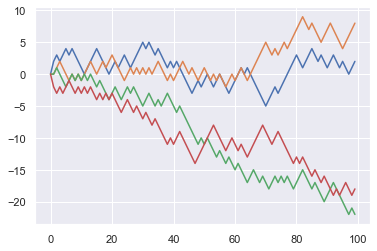

In [5]:
for i in range(4):
    plt.plot(random_walk(steps,n_steps))

**If we repeat the experiment where does the man end up in average?**



In [6]:
# Repeat the random walk n_trials time 
# Record the last position for each trial 
def monte_random_walk(n_steps,steps,n_trials):
    X_fin = np.zeros(n_trials)#<-- X_fin numpy array of (N=n_trial) zeros
    for i in range(n_trials):
        X_fin[i] =random_walk(steps,n_steps)[-1]
    return X_fin

In [7]:
n_trial = 20000
steps = [-1,1]
n_steps = 100

In [8]:
X_fin = monte_random_walk(n_steps,steps,n_trial)

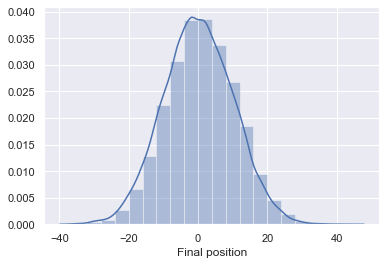

In [9]:
# Plot the distribution of X_fin
width_bin = 4
n_bins = int(np.ceil((np.max(X_fin)-np.min(X_fin))/width_bin))

sns.distplot(X_fin,kde=True,bins=n_bins);
plt.xlabel('Final position');

In [ ]:
np.std(X_fin)

![Random_walk](./Images/Image2.jpeg)





We can see a Brownian process $B(t)$ as a **continuous Gaussian** random walk. 

**Gaussian & continuous**: we divide the  observation time $t$  into $N$ small timestep $\Delta t$, so that $t=N\cdot\Delta t$.

For any time $t_i=i\cdot\Delta t$, the change in $B$ is normally distributed:

$$ B_{i+1}-B_i \sim \sqrt{\Delta t}\cdot N(0,1)$$

Taking time step $\Delta t$ smaller and smaller will make B a continuous random walk.

In [10]:
def brownian_motion(T,N,n_trials,random_seed = None):
    np.random.seed(random_seed)
    dt = T/N
    random_steps = np.sqrt(dt)*np.random.normal(loc = 0,scale = 1,size = (N,n_trials))
    random_steps[0,:] = 0
    X = np.cumsum(random_steps,axis=0)
    
    return X

In [11]:
T=7
N=100
n_trials=2000
random_seed = 1
dt=T/N
dt

0.07

In [12]:
X= brownian_motion(T,N,n_trials,random_seed)

In [13]:
# Last step
X_fin = X[-1,:]

In [ ]:
plt.plot(X);

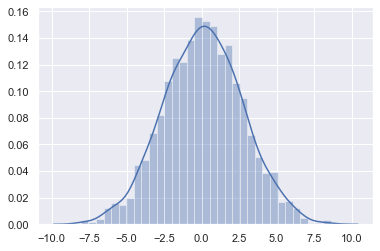

In [14]:
# Plot the distribution of X_fin
width_bin = .51
n_bins = int(np.ceil((np.max(X_fin)-np.min(X_fin))/width_bin))

sns.distplot(X_fin,bins=n_bins);


### Connection to stock-price

The dynamics of stock-prices can be modeled by the following equation:

\begin{equation}
\tag{2}
\Delta S_{t} = \mu S_{t} \Delta t + \sigma S_{t}\Delta B_{t}
\end{equation}

being:

$S$ the stock price,

$\mu$ the drift coefficient (a.k.a the mean of returns),

$\sigma$ the diffusion coefficient (a.k.a the standard deviation of returns),

$B$ the brownian motion.

The eq. (2) admits the following solution:
\begin{equation}
\tag{3}
S(t) = S_{0} \cdot e^{[(\mu - \sigma^2/2)\cdot t + \sigma \cdot B_{t}] } 
\end{equation}

In [15]:
def stock_price(N,S0,u,sigma,T,n_trials,random_seed = None):
    """
    N: number of intervals
    S0: initial stock price
    u: mean of returns over some period
    sigma: volatility a.k.a. standard deviation of returns
    random_seed: seed for pseudorandom generator
    T: observation time
    m: number of brownian path
    """
    dt = T/N 
    t = np.arange(0.,T,dt)
    t=t[:,np.newaxis]
    drift = (u - (sigma/np.sqrt(2))**2)*t
    shock = sigma * brownian_motion(T,N,n_trials,random_seed = None)
    S = S0*np.exp(drift + shock)
    return t, S

### Scraping from Yahoo Finance

In [16]:
from pandas_datareader import data as scraper
import pandas as pd

symbol = 'FB' # 'FB'Facebook, 'FCA.MI' FIAT Crysler, 'AAPL' Apple
start_date = '2020-01-01'
end_date = '2020-12-31'
df = scraper.DataReader(symbol, 'yahoo', start_date, end_date)



In [17]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,209.789993,206.270004,206.750000,209.779999,12077100,209.779999
2020-01-03,210.399994,206.949997,207.210007,208.669998,11188400,208.669998
2020-01-06,212.779999,206.520004,206.699997,212.600006,17058900,212.600006
2020-01-07,214.580002,211.750000,212.820007,213.059998,14912400,213.059998
2020-01-08,216.240005,212.610001,213.000000,215.220001,13475000,215.220001


In [ ]:
df.describe()

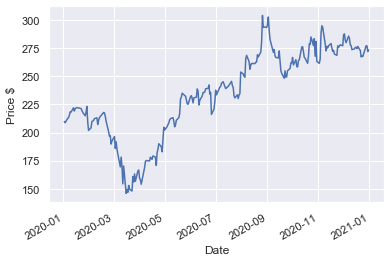

In [18]:
#close price
close_price = df['Close']
close_price.plot();
plt.ylabel('Price $');

In [19]:
# Calculate the daily percentage return
daily_return= (close_price.pct_change() )   

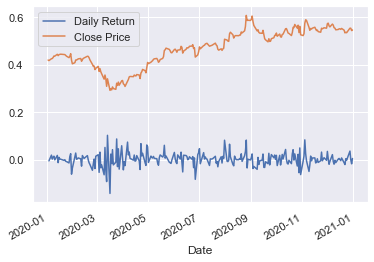

In [20]:
daily_return.plot(label='Daily Return')
(close_price*.002).plot(label='Close Price');
plt.legend();

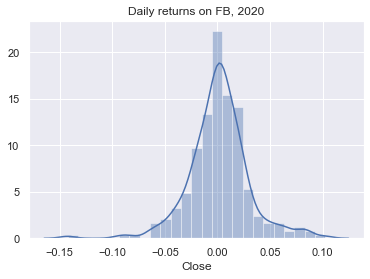

In [21]:
# Plot the distribution of daily_return
width_bin = .01
n_bins = int(np.ceil((np.max(daily_return)-np.min(daily_return))/width_bin))

sns.distplot(daily_return,bins=n_bins);
plt.title("Daily returns on FB, 2020");

In [ ]:
# Value at Risk VaR 5%
print(f'95% confidence: worst daily loss does not exceed {round(daily_return.quantile(0.05)*100,1)} % ')

In [22]:
# compute the return mu and the sigma
mu = np.mean(daily_return)
sigma  = np.std(daily_return)

print(f'Mean of daily-returns μ: {round(mu,4)*100} %')
print('')
print(f'Volatility σ: {round(sigma,3)}')


Mean of daily-returns μ: 0.15 %

Volatility σ: 0.029


In [27]:
# Parameters simulation
N = 5000 # <--- lenght of each trials
T=252    # <--- # days of a business year
S0=close_price[0]   # <--- Initial close-price
n_trials=25500  # <--- # of trials
T/N # <--- Δt about 0.05 

0.0504

In [28]:
# Extracting stock price pathways and time vector from the model
t,model_S = stock_price(N,S0,mu,sigma,T,n_trials,random_seed = 42)
#model_S.shape

In [25]:
# Define other two time range
t2=np.arange(0,253,1)



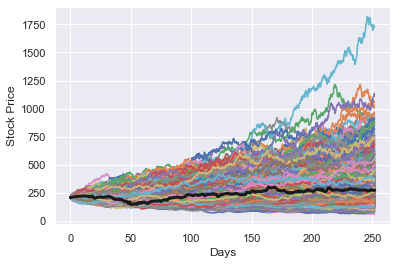

In [26]:
# Plot simulated and actual stock-prizes
plt.plot(t,model_S);
#plt.plot(t3,close_price[-12:],linewidth=3,c='k');
plt.plot(t2,close_price[:],linewidth=3,c='k');
plt.xlabel('Days');
plt.ylabel('Stock Price');

In [29]:
# Compute final predicted stock-price
S_fin = model_S[-1,:]

In [30]:
# Calculate mean and std from S_fin
mean = np.mean(S_fin)
median=np.median(S_fin)
std_ = np.std(S_fin)
min_ = np.min(S_fin)
max_ = np.max(S_fin)
print('*******************')
print(f'  * Statistics *')
print('*******************\n')
print(f'Min:                  {round(min_)} $')
print(f'Max:                {round(max_)} $')
print(f'Median:              {round(median)} $')
print(f'Mean:                {round(mean)} $')
print(f'Standard deviation:  {round(std_)} $')

*******************
  * Statistics *
*******************

Min:                  47.0 $
Max:                1705.0 $
Median:              272.0 $
Mean:                303.0 $
Standard deviation:  147.0 $


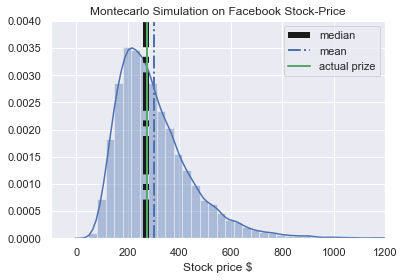

In [32]:
# Plot the simulated final stock-price
sns.distplot(S_fin);
plt.plot([median,median], [0, .02], 'k-.', lw=6,label='median')
plt.plot([mean,mean], [0, .02], 'b-.', lw=2,label='mean')
plt.plot([close_price[-1],close_price[-1]], [0, .02], 'g-', lw=2,label='actual prize')
plt.ylim(top=0.004);
plt.xlim(left=-100,right=1200)
plt.legend();
plt.title('Montecarlo Simulation on Facebook Stock-Price');
plt.xlabel('Stock price $');

In [34]:
from scipy.stats import norm,lognorm,t

In [33]:
def lognorm_fit(data_,x_min,x_max,dx):
    # Fits the datas with a log-norm distribution
    params = lognorm.fit(data_)
    shape, mean, std = params
    
    # Generate a log-norm probability distribution function pdf
    x = np.arange(x_min,x_max,dx)
    lnd = lognorm(s=shape,loc=mean,scale=std)# <--- initialise the log-norm distribution
    lognormal_pdf =lnd.pdf(x) 
    
    # Calculate the mode of distribution
    index_max = np.argmax(lognormal_pdf) #np.where(lognormal_pdf == np.max(lognormal_pdf))
    mode =x[index_max]
    return lnd,lognormal_pdf, mode,x
    

In [35]:
x_min=0
x_max=5000
dx=.1

In [36]:
# Distribution and mode
lnd_S,lognormal_pdf_S,mode_S,x = lognorm_fit(S_fin,x_min,x_max,dx)

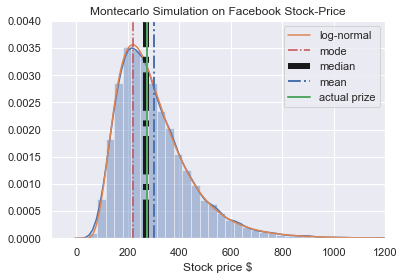

In [37]:
# Plot the simulated final stock-price
sns.distplot(S_fin);
sns.lineplot(x,lognormal_pdf_S,label = 'log-normal')
plt.plot([mode_S,mode_S],[0,.02],'r-.',label= 'mode')
plt.plot([median,median], [0, .02], 'k-.', lw=6,label='median')
plt.plot([mean,mean], [0, .02], 'b-.', lw=2,label='mean')
plt.plot([close_price[-1],close_price[-1]], [0, .02], 'g-', lw=2,label='actual prize')
plt.ylim(top=0.004);
plt.xlim(left=-100,right=1200)
plt.legend();
plt.title('Montecarlo Simulation on Facebook Stock-Price');
plt.xlabel('Stock price $');

what is the probability of having a loss after one year?

In [38]:
# Annual Return
annual_return_pct = (S_fin -S0)/S0

In [39]:
# Calculate mean and std from S_fin
mean_ar = np.mean(annual_return_pct)
median_ar=np.median(annual_return_pct)
std_ar = np.std(annual_return_pct)
min_ar = np.min(annual_return_pct)
max_ar = np.max(annual_return_pct)
print('*******************')
print(f'  * Statistics *')
print('*******************\n')
print(f'Min:                {round(min_ar,2)} %')
print(f'Max:                 {round(max_ar,2)} %')
print(f'Median:               {round(median_ar,2)} %')
print(f'Mean:                {round(mean_ar,2)} %')
print(f'Standard deviation:   {round(std_ar,2)} %')

*******************
  * Statistics *
*******************

Min:                -0.77 %
Max:                 7.13 %
Median:               0.3 %
Mean:                0.44 %
Standard deviation:   0.7 %


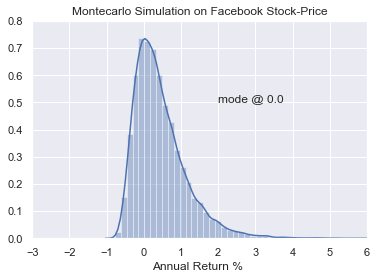

In [42]:
# Plot distribution of simulated annual return
sns.distplot(annual_return_pct);
#sns.lineplot(x_ar,lognormal_pdf_ar,label = 'log-normal');
#plt.plot([mode_ar,mode_ar],[0,.9],'k-.',label= 'mode');

plt.ylim(top=0.8);
plt.xlim(left=-3,right=6)
#plt.legend();
plt.text(x=2,y=.5,s=f'mode @ {round(mode_ar,3)}',)
plt.title('Montecarlo Simulation on Facebook Stock-Price');
plt.xlabel('Annual Return % ');

Analysis of underlying distribution

In [43]:
x_min=-5
x_max=6
dx=.001

In [44]:
# Distribution and mode
lnd_ar,lognormal_pdf_ar,mode_ar,x_ar = lognorm_fit(annual_return_pct,x_min,x_max,dx)

In [45]:
# Cumulative distribution Function CDF (probability of obtaining a value equal or smaller than the given value)
cdf = lnd_ar.cdf(x_ar) # <--- cumulative 

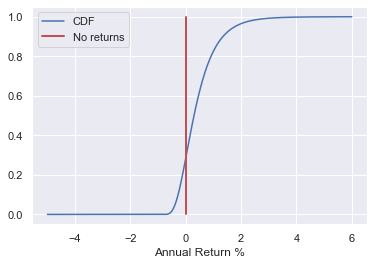

In [46]:
# Plot CDF SF function
sns.lineplot(x_ar,cdf,label='CDF');
plt.plot([0,0], [0, 1], 'r-', lw=2,label='No returns');
plt.legend();
plt.xlabel('Annual Return %');


In [47]:
def get_prob(value_return1,value_return2=None):
    
    mask_1 = (x_ar<=value_return1)
    
    if value_return2==None:
        prob = round(np.max(cdf[mask_1])*100,2)
    
    else:
        mask_2 = (x_ar<=value_return2)
        area1 = np.max(cdf[mask_1])*100
        area2 = np.max(cdf[mask_2])*100
        prob = np.round(area2 - area1,2)
    return prob

In [48]:
print('**************************************')
print('             * Results *')
print('**************************************\n')
print('      Return_1   Return_2  Probability\n')
print(f'Loss                           {get_prob(-0.0001)} %')
print(f'Gain     0.1%          1%       {get_prob(0.1,1)} % ')
print(f'Gain       1%          2%      {get_prob(1,2)} % ')



**************************************
             * Results *
**************************************

      Return_1   Return_2  Probability

Loss                           28.48 %
Gain     0.1%          1%       46.65 % 
Gain       1%          2%      13.91 % 
